In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv(r"C:\Downloads\Mall_Customers.csv")

In [4]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
data.shape

(200, 5)

# Visualizations


# Univariate Analysis

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Count'>

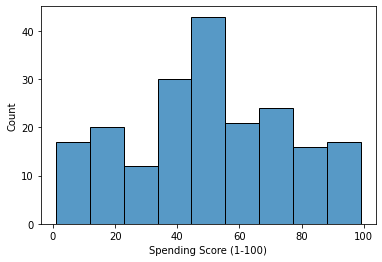

In [8]:
sns.histplot(data['Spending Score (1-100)'])

<AxesSubplot:xlabel='Age', ylabel='Density'>

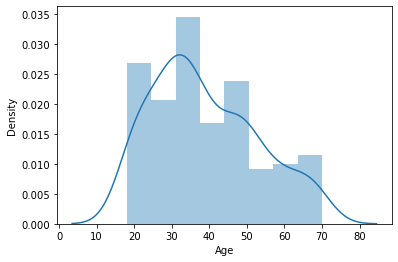

In [11]:
sns.distplot(data['Age'])

# Bivariate analysis

C:\Users\91908\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>

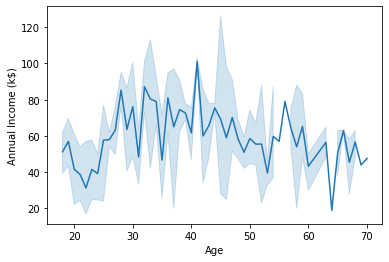

In [12]:
sns.lineplot(data['Age'],data['Annual Income (k$)'])

# Multivariate analysis

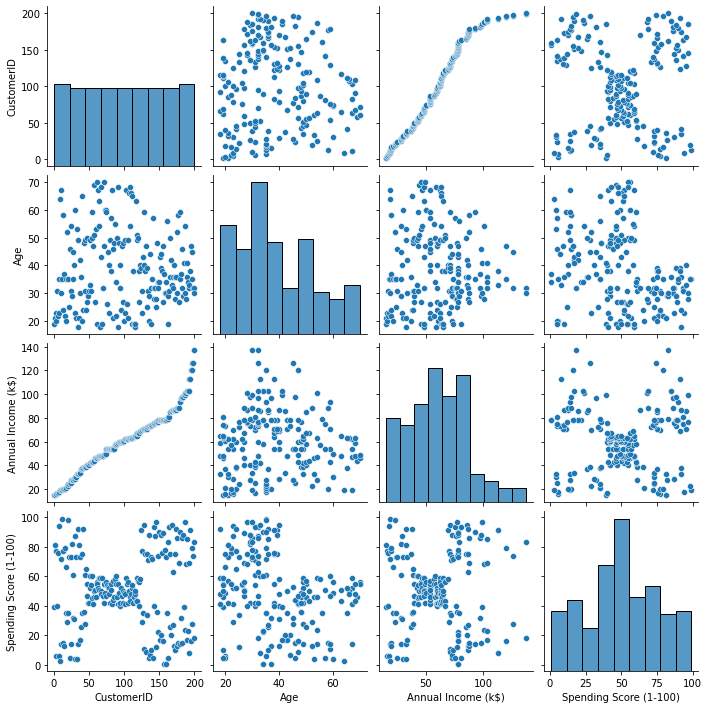

In [13]:
sns.pairplot(data)

# Descriptive Statistics

In [14]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# Check for missing values

In [15]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

No missing values were found

# Finding outliers 

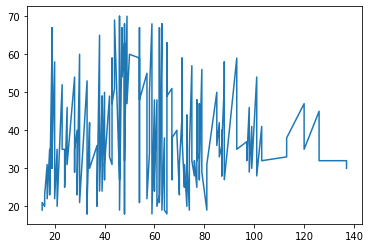

In [16]:
x = data['Annual Income (k$)']
y = data['Age']

plt.plot(x, y)


# Check for categorical columns and perfom encoding

In [17]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data.Gender=le.fit_transform(data.Gender)
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


# Scaling

In [18]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
dfscaled=pd.DataFrame(scale.fit_transform(data),columns=data.columns)
dfscaled.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0.000000,1.0,0.019231,0.000000,0.387755
1,0.005025,1.0,0.057692,0.000000,0.816327
2,0.010050,0.0,0.038462,0.008197,0.051020
3,0.015075,0.0,0.096154,0.008197,0.775510
4,0.020101,0.0,0.250000,0.016393,0.397959


# K means

In [19]:
from sklearn import cluster

In [20]:
error=[]
for i in range(1,15):
    kmeans=cluster.KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(dfscaled)
    error.append(kmeans.inertia_)


C:\Users\91908\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [21]:
error

[103.5156530146308,
 54.05097878661344,
 43.454794816515346,
 34.90188051873929,
 29.540025557086715,
 24.969480781934635,
 20.3912441592632,
 16.929788762861115,
 14.87204186862113,
 12.736718840679208,
 11.324533739393035,
 10.146868056500931,
 9.419597616209096,
 8.863848746603544]

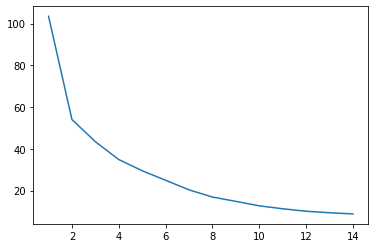

In [22]:
plt.plot(range(1,15),error)


In [23]:
kmmodel=cluster.KMeans(n_clusters=7,init='k-means++',random_state=0)
kmmodel.fit(dfscaled)


KMeans(n_clusters=7, random_state=0)

In [24]:
TargetCustomers=kmmodel.predict(dfscaled)
TargetCustomers

array([5, 5, 4, 4, 4, 4, 2, 4, 1, 4, 1, 4, 2, 4, 5, 5, 4, 5, 1, 4, 5, 5,
       2, 5, 2, 5, 2, 5, 2, 4, 1, 4, 1, 5, 2, 4, 2, 4, 2, 4, 2, 5, 1, 4,
       2, 4, 2, 4, 4, 4, 2, 5, 4, 1, 2, 1, 2, 1, 4, 1, 1, 5, 2, 2, 1, 5,
       2, 2, 5, 4, 1, 2, 2, 2, 1, 5, 2, 5, 4, 2, 1, 5, 1, 2, 4, 1, 2, 4,
       4, 2, 2, 5, 1, 2, 4, 5, 2, 4, 1, 5, 4, 2, 1, 5, 1, 4, 2, 1, 1, 1,
       1, 4, 2, 5, 4, 4, 2, 2, 2, 2, 3, 0, 0, 3, 0, 0, 6, 3, 6, 3, 6, 3,
       0, 0, 6, 0, 2, 3, 6, 0, 2, 3, 0, 0, 6, 3, 6, 0, 0, 3, 6, 3, 0, 0,
       0, 0, 6, 0, 6, 0, 0, 0, 6, 0, 6, 0, 6, 0, 0, 3, 6, 3, 6, 3, 0, 0,
       6, 3, 6, 3, 0, 0, 6, 0, 0, 3, 0, 3, 0, 0, 0, 0, 6, 0, 0, 0, 0, 3,
       6, 3])

# Adding the clustered to the primary dataset

In [30]:
data.insert(loc=4,column='TargetCustomers',value=TargetCustomers)

In [31]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),TargetCustomers,Spending Score (1-100)
0,1,1,19,15,5,39
1,2,1,21,15,5,81
2,3,0,20,16,4,6
3,4,0,23,16,4,77
4,5,0,31,17,4,40


# Split the data into dependent and independent variables

In [103]:
x=dfscaled.iloc[:,:-1]
x.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.008197,0.051020
3,0.0,0.096154,0.008197,0.775510
4,0.0,0.250000,0.016393,0.397959


In [104]:
y=dfscaled.TargetCustomers
y.head()


0    6
1    6
2    1
3    1
4    1
Name: TargetCustomers, dtype: int32

# Split the data into training and testing

In [105]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

# Build the Model

C:\Users\91908\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='TargetCustomers'>

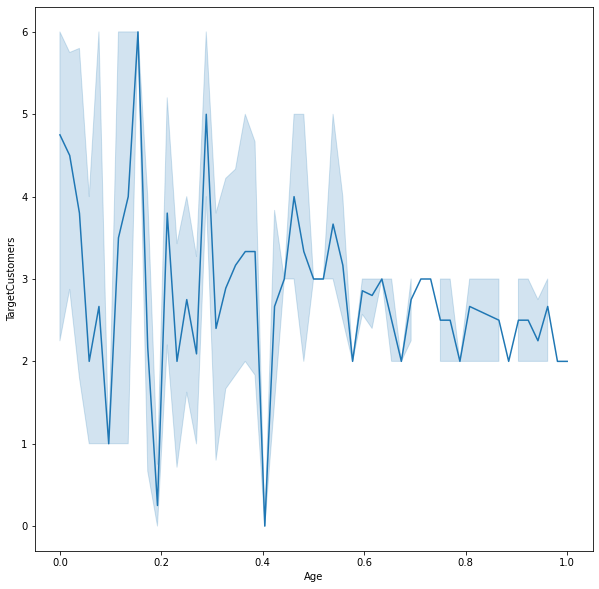

In [109]:
sns.lineplot(dfscaled.Age,dfscaled.TargetCustomers)

In [110]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

# Training the Model

In [111]:
model.fit(x_train,y_train)


LogisticRegression()

In [112]:
train_pred=model.predict(x_train)
train_pred


array([5, 3, 3, 6, 3, 3, 2, 6, 3, 4, 3, 1, 3, 1, 0, 3, 2, 3, 3, 3, 0, 3,
       4, 1, 4, 2, 3, 4, 6, 3, 4, 3, 6, 3, 5, 3, 2, 2, 6, 0, 0, 3, 5, 4,
       2, 3, 1, 2, 3, 0, 1, 2, 3, 3, 3, 2, 4, 2, 3, 3, 5, 4, 3, 6, 3, 2,
       6, 2, 4, 6, 1, 1, 1, 2, 1, 4, 6, 3, 4, 6, 6, 1, 2, 1, 1, 3, 1, 3,
       2, 5, 3, 6, 1, 3, 4, 0, 5, 6, 0, 1, 3, 2, 1, 2, 6, 6, 6, 5, 2, 1,
       1, 0, 6, 3, 1, 2, 4, 2, 3, 3, 1, 0, 1, 2, 0, 2, 2, 1, 0, 4, 1, 6,
       2, 3, 1, 3, 4, 3, 2, 6, 4, 6, 3, 3, 3, 1, 1, 3, 1, 2, 1, 3, 6, 1,
       6, 3, 5, 3, 1, 5])

# Testing the model

In [113]:
test_pred=model.predict(x_test)
test_pred


array([2, 2, 2, 2, 0, 2, 1, 2, 3, 3, 6, 1, 3, 3, 2, 1, 6, 2, 1, 2, 4, 0,
       1, 4, 2, 0, 0, 0, 3, 3, 1, 2, 2, 1, 3, 4, 0, 1, 3, 3])

# Measuring Performance

In [114]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print('test accuracy score: ',accuracy_score(y_test,test_pred))
print('train accuracy score: ',accuracy_score(y_train,train_pred))


test accuracy score:  0.875
train accuracy score:  0.975


In [115]:
pd.crosstab(y_test,test_pred)


col_0,0,1,2,3,4,6
TargetCustomers,,,,,,
0,6,0,0,0,0,0
1,0,7,0,0,0,0
2,0,0,8,0,0,0
3,0,0,0,9,0,0
4,0,1,0,0,3,0
5,0,0,4,0,0,0
6,0,0,0,0,0,2


In [116]:
pd.crosstab(y_train,train_pred)

col_0,0,1,2,3,4,5,6
TargetCustomers,,,,,,,
0,11,0,0,0,0,0,1
1,0,29,0,1,0,0,0
2,0,0,25,0,0,0,0
3,0,0,0,45,0,0,0
4,0,1,0,0,16,0,0
5,0,0,1,0,0,9,0
6,0,0,0,0,0,0,21
